In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import InputLayer, Convolution2D, Conv2D, MaxPooling2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score


## Memuat Data

Data fashion mnist dimuat dari kumpulan-kumpulan dataset yang sudah ada di *library* Keras. Berdasarkan keterangan pada [dokumentasinya](https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles) data itu terdiri suatu data latih yang terdiri dari 60000 *examples* atau observasi-observasi berlabel. Tiap-tiap observasi tersusun atas numpy *array* berukuran 28x28 yang merepresentasikan jumlah *pixel* dari tiap-tiap observasi. Di samping itu juga ada dataset uji, yang meskipun namanya data uji namun juga tetap memiliki label. *Return values*-nya berupa 2 *tuple*. Anggota-anggota dari tiap-tiap *tuple* itu memiliki tipe data numpy *ndarray*.

In [0]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## Melihat Data dan Memeriksa Data

Beberapa cara ditempuh untuk memastikan ukuran data yang dimuat sudah sesuai dengan yang ada didokumentasinya. Untuk ukuran fitur data latihnya tersusun dari 60000 observasi tiap-tiap observasi berukuran 28x28 pixel sehingga ukurang *dataset* fitur latih adalah 60000x28x28 sedangkan untuk *dataset* label latih adalah 60000x1. Untuk data uji, memiliki dimensi data fitur uji 10000x28x28 dan dimensi data label uji 10000x1


In [4]:
print('Ukuran X_train {}'.format(X_train.shape))
print('Ukuran y_train {}'.format(y_train.shape))
print('Ukuran X_test {}'.format(X_test.shape))
print('Ukuran y_test {}'.format(y_test.shape))

Ukuran X_train (60000, 28, 28)
Ukuran y_train (60000,)
Ukuran X_test (10000, 28, 28)
Ukuran y_test (10000,)


Selanjutnya adalah untuk melihat representasi gambar/ ke dalam *pixel* apakah di antara rentang kontinyu 0-1 atau rentang diskrit 0-255. Bisa dilakukan hanya dengan melihat nilai minimal dan maksimalnya. Selain itu perlu juga untuk melihat kemungkinan adanya label yang tidak sesuai. Dari dokumentasi Keras, labelnya ada 10 bernilai 0-9 untuk merepresentasikan label yang sebenarnya. Perlu dilihat bila ada label yang diluar rentang 0-9

In [5]:
print('=== X_train ===\nNilai min = {} nilai max = {}'.format(np.min(X_train), np.max(X_train)))
print('\n=== X_test ===\nNilai min = {} nilai max = {}'.format(np.min(X_test), np.max(X_test)))
print('\nLabel data latih = {}'.format(np.unique(y_train)))
print('\nLabel data uji = {}'.format(np.unique(y_test)))

=== X_train ===
Nilai min = 0 nilai max = 255

=== X_test ===
Nilai min = 0 nilai max = 255

Label data latih = [0 1 2 3 4 5 6 7 8 9]

Label data uji = [0 1 2 3 4 5 6 7 8 9]


Untuk melihat lebih jauh lagi tipe data anggota-anggota dari *dataset* tersebut apakah bernilai *integer*, *float* atau malah *string*. Akan lebih mudah jika mengguanakan salah satu metode pandas *dataframe* yaitu, info(). Sehingga datanya perlu diubah dahulu ke dalam *dataframe* pandas. Berdasarkan kode di bawah ini tipe datanya sudah numerik yaitu uint8.

In [6]:
X_train_df = pd.DataFrame(X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
y_train_df = pd.DataFrame(y_train)
X_test_df  = pd.DataFrame(X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]))
y_test_df  = pd.DataFrame(y_test)

print('Ukuran X_train_df  {}'.format(X_train_df.shape))
print('Ukuran y_train_df  {}'.format(y_train_df.shape))
print('Ukuran X_test_df  {}'.format(X_test_df.shape))
print('Ukuran y_test_df  {}'.format(y_test_df.shape))

print('Info X_train')
print(X_train_df.info())
print('\nInfo y_train')
print(y_train_df.info())
print('\nInfo X_test')
print(X_test_df.info())
print('\nInfo y_test')
print(y_test_df.info())

Ukuran X_train_df  (60000, 784)
Ukuran y_train_df  (60000, 1)
Ukuran X_test_df  (10000, 784)
Ukuran y_test_df  (10000, 1)
Info X_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 44.9 MB
None

Info y_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 1 columns):
0    60000 non-null uint8
dtypes: uint8(1)
memory usage: 58.7 KB
None

Info X_test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 7.5 MB
None

Info y_test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
0    10000 non-null uint8
dtypes: uint8(1)
memory usage: 9.8 KB
None


Lihat 3 kolom pertama dari masing-masing *dataframe*

In [7]:
print(X_train_df.head(3))
print(y_train_df.head(3))
print(X_test_df.head(3))
print(y_test_df.head(3))

   0    1    2    3    4    5    6    ...  777  778  779  780  781  782  783
0    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
1    0    0    0    0    0    1    0  ...   76    0    0    0    0    0    0
2    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0

[3 rows x 784 columns]
   0
0  9
1  0
2  0
   0    1    2    3    4    5    6    ...  777  778  779  780  781  782  783
0    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
1    0    0    0    0    0    0    0  ...    3  174  189   67    0    0    0
2    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0

[3 rows x 784 columns]
   0
0  9
1  2
2  1


Langkah selanjutnya adalah memeriksa kemungkinan adanya data yang bernilai NaN. Meskipun dari metode info() sudah terlihat tidak memiliki NaN. Namun itu eksplisit hanya pada data label, untuk data fitur hanya implisit saja. Sehingga akan dipastikan menggunakan kode di bawah ini. Pandas *dataframe* dikenakan pada metode isnull() akan bernilai True (1) untuk data bertipe NaN, lainnya False (0). Metode sum() pertama melakukan penjumlahan di sepanjang baris dan *return values*-nya adalah pandas *series* kemudian dijumlahkan kedua kalinya untuk menghitung ada tidaknya nilai NaN. Akan bernilai nol jika tidak ada NaN, bernilai lainnya (bilangan bulat positif) jika ada NaN.

In [8]:
print('Jumlah NaN di X_train_df = {}'.format(X_train_df.isnull().sum(axis=0).sum(axis=0)))
print('Jumlah NaN di X_test_df = {}'.format(X_test_df.isnull().sum(axis=0).sum(axis=0)))

Jumlah NaN di X_train_df = 0
Jumlah NaN di X_test_df = 0


Ukuran dari X_train, y_train, X_test dan y_test masih belum sesuai untuk arsitektur CNN. Bentuk dari X_train dan X_test perlu diubah ke bentuk jumlah_observasi x image_height x image_width x image_depth. Untuk y_train dan y_test perlu diubah ke bentuk *one hot*.

Selain itu representasi warna dalam angka masih diskrit di antara 0-255 sehingga nilai variabelnya bisa timpang begiupula ketika perhitungan, untuk itu perlu diskalakan ulang menjadi kontinyu di antara 0-1. 

In [9]:
img_height, img_width, img_depth = X_train.shape[1], X_train.shape[2], 1
print(img_height, img_width, img_depth)

28 28 1


Code dibawah ini untuk mengubah ukuran dari (jumlah_observasi x 28 x 28) menjadi (jumlah_observasi x 28 x 28 x1)dan juga untuk menskalakan ulang representasi warna menjadi kontinyu di antara 0-1. Selain itu juga mengubah nilai label ke bentuk *one hot*-nya sehingga bentuknya menjadi (jumlah_observasi x humlah_kelas).  

In [0]:
def reshape(fitur, target):
  fitur = fitur.reshape(fitur.shape[0], img_height, img_width, img_depth)
  target = np_utils.to_categorical(target, 10)
  fitur = fitur.astype('float32')
  fitur = fitur/255
  return fitur, target

In [11]:
X_train_baru, y_train_baru = reshape(X_train, y_train)
X_test_baru, y_test_baru = reshape(X_test, y_test)

# Cek ulang beberapa hal
print('Ukuran X_train_baru {}'.format(X_train_baru.shape))
print('Ukuran y_train_baru {}'.format(y_train_baru.shape))
print('Ukuran X_test_bar {}'.format(X_test_baru.shape))
print('Ukuran y_test_baru {}'.format(y_test_baru.shape))

print('\n=== X_train_baru ===\nNilai min = {} nilai max = {}'.format(np.min(X_train_baru), np.max(X_train_baru)))
print('\n=== X_test_baru ===\nNilai min = {} nilai max = {}'.format(np.min(X_test_baru), np.max(X_test_baru)))

Ukuran X_train_baru (60000, 28, 28, 1)
Ukuran y_train_baru (60000, 10)
Ukuran X_test_bar (10000, 28, 28, 1)
Ukuran y_test_baru (10000, 10)

=== X_train_baru ===
Nilai min = 0.0 nilai max = 1.0

=== X_test_baru ===
Nilai min = 0.0 nilai max = 1.0


## Visualisasi Data

Visualisasi data yang pertama adalah digunakan untuk mengetahui jumlah observasi dari masing-masing kelas pada dataset latih dan dataset uji.

In [0]:
def bar_plot(data1, labels1, jenis): #data1=X_train, labels1=y_train
  uplot_df = pd.DataFrame(data1.reshape(data1.shape[0], data1.shape[1]*data1.shape[2]))
  uplot_df[784] = labels1
  global num_per_kelas
  num_per_kelas = pd.DataFrame((uplot_df.groupby(784).size()))
  num_per_kelas[1] = range(0,10)
  global nominal
  nominal = {0:'T-shirt/top',
             1:'Trouser',
             2:'Pullover',
             3:'Dress',
             4:'Coat',
             5:'Sandal',
             6:'Shirt',
             7:'Sneaker',
             8:'Bag',
             9:'Ankle boot'}

  num_per_kelas[1] = num_per_kelas[1].map(nominal)
  plt.bar(x=num_per_kelas[1], height=num_per_kelas[0], color='green')
  plt.title('Grafik Jumlah Observasi pada Suatu Kelas di Dataset '+str(jenis))
  plt.show()

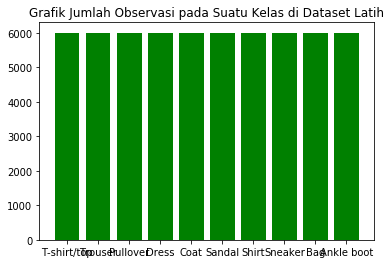

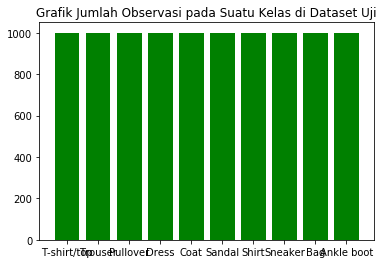

In [13]:
bar_plot(X_train, y_train, 'Latih')
bar_plot(X_test, y_test, 'Uji')

Bagian ini untuk memvisualisasikan masing-masing observasi yang masih berbentuk *pixel* menjadi suatu gambar. Pemilihan data dilakukan secara acak menggunakan metode randomint(). Untuk mengubah pixel itu menggunakan metode imshow() dengan parameter cmap bernilai 'grey'.

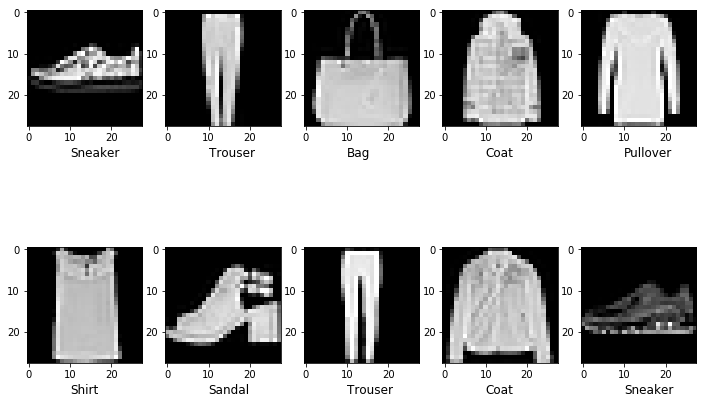

In [14]:
fig, axes = plt.subplots(2,5)
fig.set_size_inches(12, 8)
for row in axes:
  for axe in row:
    idx = np.random.randint(0, 10000)
    axe.imshow(X_train[idx,:,:], cmap='gray')
    axe.text(10, 35, nominal[y_train[idx]], fontdict={'fontsize':12})

## Arsitektur CNN

### Arsitektur CNN_1 

Arsitektur ConvNet ini terdiri dari 1 lapisan masukan (*input*), 4 lapisan konvolusi dan 2 lapisan *fully concected standard neural network* sebagai *hidden layer*-nya, dan 1 lapisan keluaran (*output*). 

*Hidden layer* yang pertama berupa lapisan konvolusi yang memiliki 64 *filter* dengan ukuran 4 x 4. Fungsi aktifasi yang digunakan adalah ReLU dan *padding*-nya bernilai *'same'*. Sehingga menghasilkan output dengan tinggi x lebar yang sama seperti input yaitu (28 x 28) ditambah ke dalaman 64 lapis (28 x 28 x 64).

*Hidden layer* kedua juga berupa lapisan konvolusi dengan argumen-argumen yang sama. Namun memiliki *maximum pooling* dengan ukuran (2 x 2) dan *stride* = 2 sehingga ouputnya adalah separuh dari sebelumnya, yaitu (14 x 14 x 64). Kemudian hanya 75% yang digunakan (*dropout* = 25%)

*Hidden layer* ketiga berupa lapisan konvolusi yang memiliki 64 *filter* berukuran (3 x 3). Fungsi aktifasi yang digunakan adalah ReLU dan *padding*-nya bernilai *'same'*. Sehingga menghasilkan output dengan tinggi x lebar x kedalaman yang sama seperti input yaitu (14 x 14 x 64).

*Hidden layer* keempat berupa lapisan konvolusi yang memiliki 64 *filter* berukuran (3 x 3). Namun diikuti dengan *maximum pooling* untuk memperkecil *feature map*/ *convolved layer* menjadi berukuran separuhnya (7 x 7 x 64). Dan digunakan hanya 0.6 bagiannya saja (*dropout* = 0.4)

Kemudian lapisan-lapisan konvolusi itu dihubungkan dengan lapisan *fully connected*/ *standard neural network*. Pertama kali output dari CNN perlu didatarkan kemudian dinormalisasi.
Lapisan *fully connected* yang pertama memiliki 512 *neuron* sedangkan yang kedua memiliki 64 *neuron*. Keduanya menggunakan fungsi aktifasi ReLU dan *dropout* = 0.2. *Output* lapisan *fully connected* kedua dinormalisasi.

Lapisan-lapisan yang sebelumnya itu kemudian dihubungkan dengan lapisan *output* yang memiliki 10 *neuron* untuk merepresentasikan kelas. Fungsi aktifasi yang digunakan adalah softmax.

Untuk menghitung *cost function* digunakan *categorical costentropy* menggunakan pengoptimasi Adam.

In [15]:
def cnn1():
  cnn = Sequential()
  
  cnn.add(InputLayer(input_shape=(img_height, img_width, img_depth)))
  
  cnn.add(Convolution2D(64, (4, 4), padding='same', activation='relu'))
  
  cnn.add(Convolution2D(64, (4, 4), padding='same', activation='relu'))
  cnn.add(MaxPooling2D(pool_size=(2, 2)))
  cnn.add(Dropout(0.25))
  
  cnn.add(Convolution2D(64, (3, 3), padding='same', activation='relu'))
  
  cnn.add(Convolution2D(64, (3, 3), padding='same', activation='relu'))
  cnn.add(MaxPooling2D(pool_size=(2, 2)))
  cnn.add(Dropout(0.4))
  
  cnn.add(Flatten())
  cnn.add(BatchNormalization())
  
  cnn.add(Dense(512, activation='relu'))
  cnn.add(Dropout(0.2))
  
  cnn.add(Dense(64, activation='relu'))
  cnn.add(BatchNormalization())
  cnn.add(Dropout(0.2))
  
  cnn.add(Dense(10, activation='softmax'))
  cnn.compile(loss='categorical_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

  return cnn
cnn1().summary()

W0818 18:38:24.848601 139717958825856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0818 18:38:24.854688 139717958825856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0818 18:38:24.867279 139717958825856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0818 18:38:24.910845 139717958825856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0818 18:38:24.918201 139717958825856 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        1088      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        65600     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

### Arsitektur CNN_2 

Arsitektur CNN_2 menggunakan arsitektur CNN_1 pada lapisan konvolusinya. Namun bagian lapisan *fully conected neural network*-nya hanya menggunakan 1 lapisan yang terdiri dari 64 *neuron*

In [16]:
def cnn2():
  cnn = Sequential()
  
  cnn.add(InputLayer(input_shape=(img_height, img_width, img_depth)))
  
  cnn.add(Convolution2D(64, (4, 4), padding='same', activation='relu'))
  
  cnn.add(Convolution2D(64, (4, 4), padding='same', activation='relu'))
  cnn.add(MaxPooling2D(pool_size=(2, 2)))
  cnn.add(Dropout(0.25))
  
  cnn.add(Convolution2D(64, (3, 3), padding='same', activation='relu'))
  
  cnn.add(Convolution2D(64, (3, 3), padding='same', activation='relu'))
  cnn.add(MaxPooling2D(pool_size=(2, 2)))
  cnn.add(Dropout(0.4))
  
  cnn.add(Flatten())
  cnn.add(BatchNormalization())

  cnn.add(Dense(64, activation='relu'))
  cnn.add(BatchNormalization())
  cnn.add(Dropout(0.2))
  
  cnn.add(Dense(10, activation='softmax'))
  cnn.compile(loss='categorical_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

  return cnn
cnn2().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 64)        1088      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        65600     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
__________

### Arsitektur CNN_3 

Arsitektur CNN_3 menggunakan arsitektur CNN_1 pada lapisan konvolusinya. Namun bagian lapisan *fully conected neural network*-nya menggunakan 2 lapisan yang terdiri dari 64 *neuron* dan 32 *neuron


*

In [17]:
def cnn3():
  cnn = Sequential()
  
  cnn.add(InputLayer(input_shape=(img_height, img_width, img_depth)))
  
  cnn.add(Convolution2D(64, (4, 4), padding='same', activation='relu'))
  
  cnn.add(Convolution2D(64, (4, 4), padding='same', activation='relu'))
  cnn.add(MaxPooling2D(pool_size=(2, 2)))
  cnn.add(Dropout(0.25))
  
  cnn.add(Convolution2D(64, (3, 3), padding='same', activation='relu'))
  
  cnn.add(Convolution2D(64, (3, 3), padding='same', activation='relu'))
  cnn.add(MaxPooling2D(pool_size=(2, 2)))
  cnn.add(Dropout(0.4))
  
  cnn.add(Flatten())
  cnn.add(BatchNormalization())
  
  cnn.add(Dense(64, activation='relu'))
  cnn.add(Dropout(0.2))
  
  cnn.add(Dense(32, activation='relu'))
  cnn.add(BatchNormalization())
  cnn.add(Dropout(0.2))
  
  cnn.add(Dense(10, activation='softmax'))
  cnn.compile(loss='categorical_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

  return cnn
cnn3().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 64)        1088      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 64)        65600     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
__________

### Arsitektur CNN_4 

Arsitektur CNN_4 menggunakan arsitektur CNN_1 pada lapisan konvolusinya. Namun bagian lapisan *fully conected neural network*-nya hanya menggunakan 1 lapisan yang terdiri dari 32 *neuron*

In [18]:
def cnn4():
  cnn = Sequential()
  
  cnn.add(InputLayer(input_shape=(img_height, img_width, img_depth)))
  
  cnn.add(Convolution2D(64, (4, 4), padding='same', activation='relu'))
  
  cnn.add(Convolution2D(64, (4, 4), padding='same', activation='relu'))
  cnn.add(MaxPooling2D(pool_size=(2, 2)))
  cnn.add(Dropout(0.25))
  
  cnn.add(Convolution2D(64, (3, 3), padding='same', activation='relu'))
  
  cnn.add(Convolution2D(64, (3, 3), padding='same', activation='relu'))
  cnn.add(MaxPooling2D(pool_size=(2, 2)))
  cnn.add(Dropout(0.4))
  
  cnn.add(Flatten())
  cnn.add(BatchNormalization())

  cnn.add(Dense(32, activation='relu'))
  cnn.add(BatchNormalization())
  cnn.add(Dropout(0.2))
  
  cnn.add(Dense(10, activation='softmax'))
  cnn.compile(loss='categorical_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

  return cnn
cnn4().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 64)        1088      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 64)        65600     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
__________

### Memecah Data Menjadi Data Latih dan Validasi

Dibagian ini, data latih yang memiliki 60000 observasi akan dipecah secara acak menjadi data latih sebanyak 80% dan data validasi sebanyak 20% menggunakan *module* train_test_split. Menghasilkan 48000 data digunakan sebagai data latih dan 12000 data sebagai data validasi.

In [0]:
X_train_baru1, X_val, y_train_baru1, y_val = train_test_split(
    X_train_baru, y_train_baru, test_size=0.2, random_state=50
)

In [20]:
print(X_train_baru1.shape, y_train_baru1.shape)
print(X_val.shape, y_val.shape)


(48000, 28, 28, 1) (48000, 10)
(12000, 28, 28, 1) (12000, 10)


### Melatih Data

Bagian ini memulai melatih model dari arsitektur CNN_1 sampai CNN_4 menggunakan ukuran batch 250 dan *epoch* 100 kali. Model ini kemudian dihitung *loss* dan akurasinya di data latih dan data validasi.

In [0]:
def melatih_model(nama_model):
  return nama_model.fit(X_train_baru1, y_train_baru1, batch_size = 250, epochs = 100, verbose = 1, validation_data = (X_val, y_val))

In [22]:
historia_a = melatih_model(cnn1())

W0818 18:39:32.024357 139717958825856 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 17s 354us/step - loss: 0.6007 - acc: 0.7851 - val_loss: 0.3527 - val_acc: 0.8704
Epoch 2/100
48000/48000 [==============================] - 14s 287us/step - loss: 0.3587 - acc: 0.8697 - val_loss: 0.2904 - val_acc: 0.8942
Epoch 3/100
48000/48000 [==============================] - 14s 286us/step - loss: 0.2996 - acc: 0.8910 - val_loss: 0.2505 - val_acc: 0.9085
Epoch 4/100
48000/48000 [==============================] - 14s 287us/step - loss: 0.2678 - acc: 0.9027 - val_loss: 0.2293 - val_acc: 0.9157
Epoch 5/100
48000/48000 [==============================] - 14s 286us/step - loss: 0.2454 - acc: 0.9110 - val_loss: 0.2168 - val_acc: 0.9183
Epoch 6/100
48000/48000 [==============================] - 14s 287us/step - loss: 0.2257 - acc: 0.9174 - val_loss: 0.2202 - val_acc: 0.9168
Epoch 7/100
48000/48000 [==============================] - 14s 287us/step - loss: 0.2101 - acc: 0.9233 - val_l

In [25]:
historia_b = melatih_model(cnn2())

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 14s 295us/step - loss: 0.6248 - acc: 0.7774 - val_loss: 0.3722 - val_acc: 0.8581
Epoch 2/100
48000/48000 [==============================] - 13s 268us/step - loss: 0.3620 - acc: 0.8704 - val_loss: 0.2896 - val_acc: 0.8912
Epoch 3/100
48000/48000 [==============================] - 13s 270us/step - loss: 0.2996 - acc: 0.8912 - val_loss: 0.2540 - val_acc: 0.9036
Epoch 4/100
48000/48000 [==============================] - 13s 269us/step - loss: 0.2676 - acc: 0.9026 - val_loss: 0.2463 - val_acc: 0.9082
Epoch 5/100
48000/48000 [==============================] - 13s 268us/step - loss: 0.2445 - acc: 0.9122 - val_loss: 0.2328 - val_acc: 0.9095
Epoch 6/100
48000/48000 [==============================] - 13s 269us/step - loss: 0.2307 - acc: 0.9154 - val_loss: 0.2207 - val_acc: 0.9190
Epoch 7/100
48000/48000 [==============================] - 13s 269us/step - loss: 0.2170 - acc: 0.9200 - val_l

In [27]:
historia_c = melatih_model(cnn3())

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 15s 309us/step - loss: 0.8256 - acc: 0.7234 - val_loss: 0.4831 - val_acc: 0.8201
Epoch 2/100
48000/48000 [==============================] - 13s 274us/step - loss: 0.4333 - acc: 0.8530 - val_loss: 0.3005 - val_acc: 0.8905
Epoch 3/100
48000/48000 [==============================] - 13s 272us/step - loss: 0.3520 - acc: 0.8790 - val_loss: 0.3063 - val_acc: 0.8912
Epoch 4/100
48000/48000 [==============================] - 13s 271us/step - loss: 0.3133 - acc: 0.8907 - val_loss: 0.2412 - val_acc: 0.9106
Epoch 5/100
48000/48000 [==============================] - 13s 275us/step - loss: 0.2899 - acc: 0.8994 - val_loss: 0.2324 - val_acc: 0.9110
Epoch 6/100
48000/48000 [==============================] - 13s 273us/step - loss: 0.2646 - acc: 0.9068 - val_loss: 0.2175 - val_acc: 0.9172
Epoch 7/100
48000/48000 [==============================] - 13s 275us/step - loss: 0.2490 - acc: 0.9119 - val_l

In [29]:
historia_d = melatih_model(cnn4())

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 15s 308us/step - loss: 0.6853 - acc: 0.7687 - val_loss: 0.3628 - val_acc: 0.8684
Epoch 2/100
48000/48000 [==============================] - 13s 269us/step - loss: 0.3891 - acc: 0.8650 - val_loss: 0.3178 - val_acc: 0.8792
Epoch 3/100
48000/48000 [==============================] - 13s 269us/step - loss: 0.3195 - acc: 0.8898 - val_loss: 0.2590 - val_acc: 0.9047
Epoch 4/100
48000/48000 [==============================] - 13s 268us/step - loss: 0.2862 - acc: 0.8996 - val_loss: 0.2451 - val_acc: 0.9106
Epoch 5/100
48000/48000 [==============================] - 13s 268us/step - loss: 0.2634 - acc: 0.9067 - val_loss: 0.2240 - val_acc: 0.9175
Epoch 6/100
48000/48000 [==============================] - 13s 268us/step - loss: 0.2473 - acc: 0.9118 - val_loss: 0.2131 - val_acc: 0.9201
Epoch 7/100
48000/48000 [==============================] - 13s 270us/step - loss: 0.2320 - acc: 0.9166 - val_l

### Membuat Prediksi Akurasi di Data Uji
Menggunakan model yang telah di latih di atas ke data X_test_baru kemudian hitung nilai akurasinya. Kebenaran dari nilai prediksi dari model, dibandingkan dengan label sesungguhnya menggunakan *module* Keras yaitu accuracy_score sehingga diperoleh nilai akurasinya. Proses ini dilakukan masing-masing untuk hasil prediksi dari CNN_1, CNN_2, CNN_3, dan CNN_4. Proses ini menggunakan atribut model dari objek history keras yang akan menghasilan objek Sequential keras yang mewarisi sifat-sifat model yang dilatih. Kemudian dikenakan ke metode predict() untuk memperoleh nilai prediksi/ memprediksi label dari data uji (X_test_baru)

In [0]:
def memprediksi(historia):
  modyel = historia.model
  prediksi = modyel.predict(X_test_baru)
  prediksii = np.argmax(prediksi, axis=1) #argmax digunakan untuk memilih nilai yang paling besar dari suatu one_hot prediksi_a, axis=1 mencari terbesar sepanjang kolom
  return prediksii

In [24]:
prediksi_a1 = memprediksi(historia_a)
print('Akurasi model CNN1 di data uji= {}'.format(np.round(accuracy_score(y_test, prediksi_a1)*100, 2)))

Akurasi model CNN1 di data uji= 93.72


In [26]:
prediksi_b1 = memprediksi(historia_b)
print('Akurasi model CNN2 di data uji= {}'.format(np.round(accuracy_score(y_test, prediksi_b1)*100, 2)))

Akurasi model CNN2 di data uji= 93.58


In [28]:
prediksi_c1 = memprediksi(historia_c)
print('Akurasi model CNN2 di data uji= {}'.format(np.round(accuracy_score(y_test, prediksi_c1)*100, 2)))

Akurasi model CNN2 di data uji= 94.03


In [30]:
prediksi_d1 = memprediksi(historia_d)
print('Akurasi model CNN2 di data uji= {}'.format(np.round(accuracy_score(y_test, prediksi_d1)*100, 2)))

Akurasi model CNN2 di data uji= 93.58


In [0]:
akurasi_uji = {'CNN_1':93.72, 'CNN_2':93.58, 'CNN_3':94.03, 'CNN_4':93.58}

## Evaluasi Model

### Akurasi Model

Bagian ini digunakan untuk menampakkan grafik akurasi dan *loss* dari model yang sudah dilatih di data latih dan divalidasi di data validasi. *Return values* dari Sequential.fit() adalah suatu objek history Keras, objek ini memiliki beberapa atribut diantaranya atribut history yang digunakan untuk menampilkan history nilai loss, acc (akurasi), val_loss (loss di data validasi), dan val_acc (akurasi di data validasi) ke dalam suatu list.

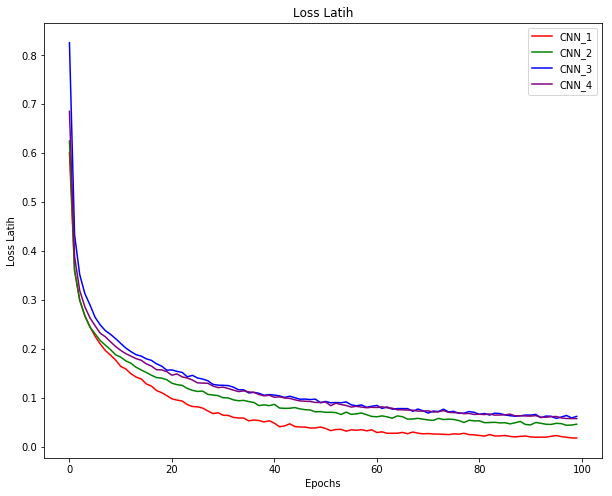

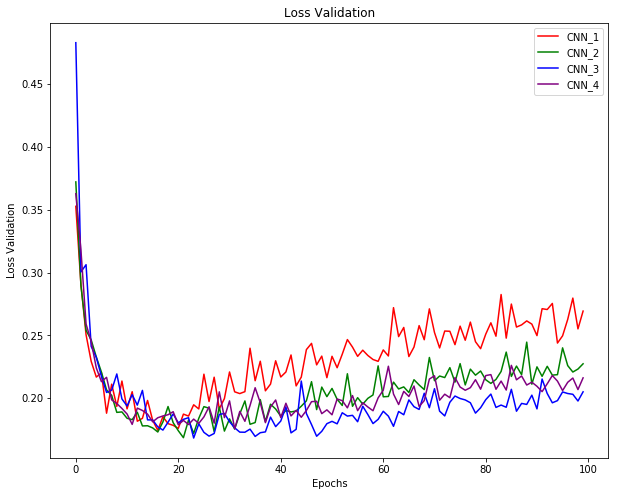

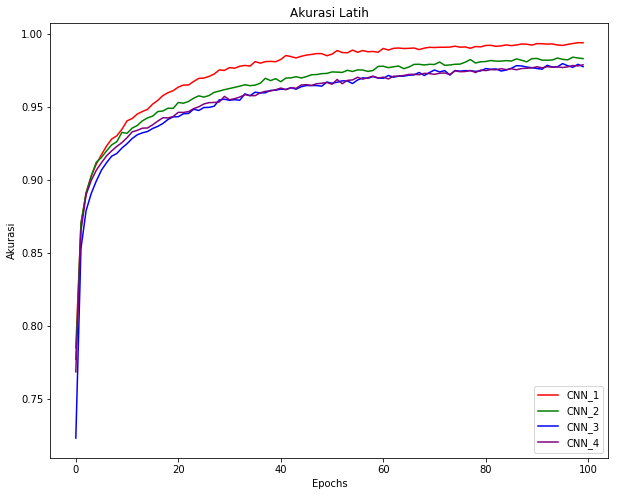

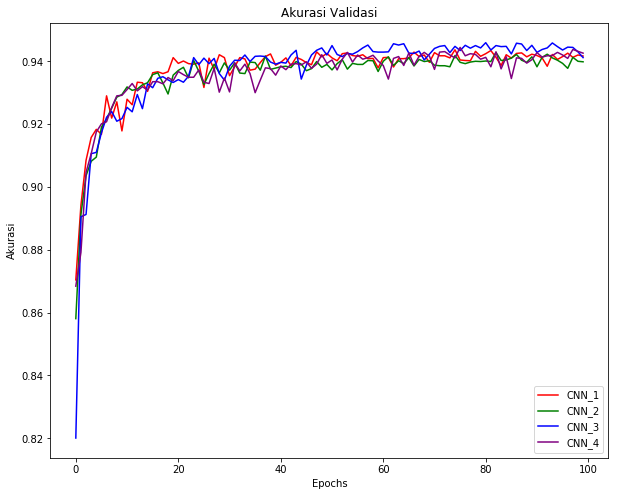

In [33]:
# Siapkan data untuk plotting loss dan akurasi pada data laith dan validasi
loss_a = historia_a.history['loss']
acc_a  = historia_a.history['acc']
val_loss_a = historia_a.history['val_loss']
val_acc_a = historia_a.history['val_acc']

loss_b = historia_b.history['loss']
acc_b = historia_b.history['acc']
val_loss_b = historia_b.history['val_loss']
val_acc_b = historia_b.history['val_acc']

loss_c = historia_c.history['loss']
acc_c = historia_c.history['acc']
val_loss_c = historia_c.history['val_loss']
val_acc_c = historia_c.history['val_acc']

loss_d = historia_d.history['loss']
acc_d = historia_d.history['acc']
val_loss_d = historia_d.history['val_loss']
val_acc_d = historia_d.history['val_acc']

# Plot Loss Latih
plt.figure(figsize=(10,8))
p_loss_a = plt.plot(loss_a, 'red')
p_loss_b = plt.plot(loss_b, 'green')
p_loss_c = plt.plot(loss_c, 'blue')
p_loss_d = plt.plot(loss_d, 'purple')

plt.xlabel('Epochs')
plt.ylabel('Loss Latih')
plt.title('Loss Latih')
plt.legend(["CNN_1", "CNN_2", 'CNN_3', 'CNN_4'], loc=0)
plt.show()

# Plot Loss Validasi
plt.figure(figsize=(10,8))
p_val_loss_a = plt.plot(val_loss_a, 'red')
p_val_loss_b = plt.plot(val_loss_b, 'green')
p_val_loss_c = plt.plot(val_loss_c, 'blue')
p_val_loss_d = plt.plot(val_loss_d, 'purple')

plt.xlabel('Epochs')
plt.ylabel('Loss Validation')
plt.title('Loss Validation')
plt.legend(["CNN_1", "CNN_2", 'CNN_3', 'CNN_4'], loc=0)
plt.show()

# Plot Akurasi Latih
plt.figure(figsize=(10,8))
p_acc_a = plt.plot(acc_a, 'red')
p_acc_b = plt.plot(acc_b, 'green')
p_acc_c = plt.plot(acc_c, 'blue')
P_acc_d = plt.plot(acc_d, 'purple')


plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.title('Akurasi Latih')
plt.legend(['CNN_1', 'CNN_2', 'CNN_3', 'CNN_4'], loc=4)
plt.show()

# Plot Akurasi Validasi
plt.figure(figsize=(10,8))
p_val_acc_a = plt.plot(val_acc_a, 'red')
p_val_acc_b = plt.plot(val_acc_b, 'green')
p_val_acc_c = plt.plot(val_acc_c, 'blue')
p_val_acc_d = plt.plot(val_acc_d, 'purple')

plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.title('Akurasi Validasi')
plt.legend(['CNN_1', 'CNN_2', 'CNN_3', 'CNN_4'], loc=4)
plt.show()


### Confusion Matrix

Membuat *confusion matrix* untuk melihat kecocokan prediksi model dengan label asli.


In [0]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontdict={'fontsize':16})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


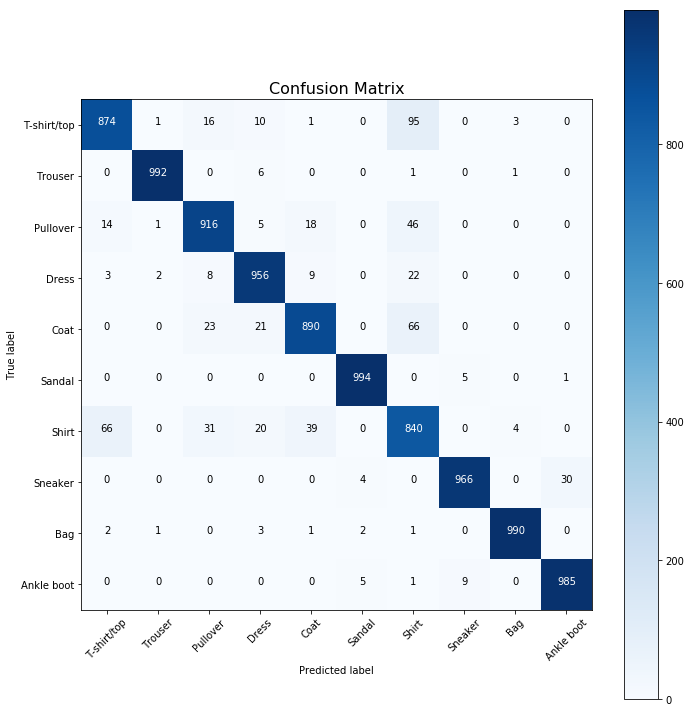

In [35]:
confuse_matrix = confusion_matrix(y_test, prediksi_c1)
aaa = ((list(num_per_kelas.iloc[:,1])))
plot_confusion_matrix(confuse_matrix, aaa)

### F1-Score, Precision, Recall

In [36]:
print(classification_report(y_test, prediksi_c1))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1000
           1       0.99      0.99      0.99      1000
           2       0.92      0.92      0.92      1000
           3       0.94      0.96      0.95      1000
           4       0.93      0.89      0.91      1000
           5       0.99      0.99      0.99      1000
           6       0.78      0.84      0.81      1000
           7       0.99      0.97      0.98      1000
           8       0.99      0.99      0.99      1000
           9       0.97      0.98      0.98      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



Menebak gambar fashion MNIST menggunakan model yang telah dilatih.

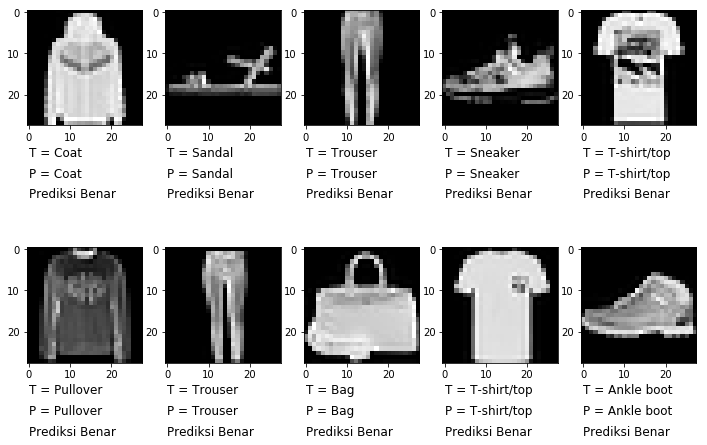

In [41]:
fig, axes = plt.subplots(2,5)
fig.set_size_inches(12, 8)
for row in axes:
  for axe in row:
    idx = np.random.randint(0, 10000)
    axe.imshow(X_test[idx,:,:], cmap='gray')
    axe.text(0, 35, 'T = {}'.format(nominal[y_test[idx]]), fontdict={'fontsize':12})
    axe.text(0, 40, 'P = {}'.format(nominal[prediksi_c1[idx]]), fontdict={'fontsize':12})
    if y_test[idx] == prediksi_c1[idx]:
      axe.text(0, 45, 'Prediksi Benar', fontdict={'fontsize':12})
    else:
      axe.text(0, 45, 'Prediksi Salah', fontdict={'fontsize':12})

# AUTHOR
Fadhlan Wissa Hasibuan

Dhani Nur Indra Syamputra

Ervien Ismunandar

Hanif Nata Wijaya

*FRESH GRADUATE ACADEMY UNIVERSITAS ISLAM INDONESIA*